---
title: "Modul 7 Sains Data: *Deep Learning* dengan Keras, Regresi dan Klasifikasi Gambar"
subtitle: Functional API & Subclassing API dari Keras, Regresi & Klasifikasi Gambar dengan Neural Network"
image: static\aggarwal_nndl_hal18.png
description: "Offline di Departemen Matematika"
date: 05/05/2025
page-navigation: true
format: html
---

Kembali ke [Sains Data](./saindat2025genap.qmd)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# *Perceptron, revisited*: selain *Sequential API*


Di pertemuan sebelumnya, kita telah menyusun *perceptron* menggunakan Sequential API seperti berikut (ada dua cara yang ekuivalen):

In [ ]:
# langsung menentukan semua layer di awal, dengan memasukkan list
model0 = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape = (2,)),
        keras.layers.Dense(units = 1, activation = keras.activations.sigmoid)
    ]
)

In [3]:
# menambahkan layer secara berangsur-angsur
model0 = keras.Sequential()
model0.add(keras.layers.InputLayer(input_shape = (2,)))
model0.add(keras.layers.Dense(units = 1, activation = keras.activations.sigmoid))

Sequential API sebenarnya cukup terbatas: tiap *layer* harus berurutan satu sama lain, dan hubungan yang ada hanyalah antar pasangan dua *layer* yang bersebelahan.

Untuk model-model yang kita pelajari di mata kuliah Sains Data, sebenarnya Sequential API sudah cukup. Namun, kalau kalian pelajari lebih lanjut tentang *neural network* / *deep learning*, kalian akan bertemu dengan arsitektur aneh yang tidak bisa langsung disusun dengan Sequential API.

Contohnya, ada yang namanya *skip connection*, yaitu suatu *layer* terhubung dengan *layer* lain yang agak jauh darinya:

![](./static/aggarwal_nndl_hal348.png)

Sumber gambar: Aggarwal (2018) hal. 348

(*Skip connection* akan kalian temui kalau mempelajari *residual network*, yaitu arsitektur ResNet dan variasinya, yang sudah sangat di luar cakupan materi mata kuliah Sains Data.)

Untuk itu, diperlukan API selain *Sequential*, yaitu bisa dengan *Functional API* atau dengan *Subclassing API*. Agar kalian lebih mengenal Keras, kita akan mencoba membuat *perceptron* menggunakan dua API lainnya tersebut.

Kita bisa uji coba dengan dataset yang sama seperti di pertemuan sebelumnya: [titik_negatif_positif.csv](./titik_negatif_positif.csv)

In [5]:
df = pd.read_csv("./titik_negatif_positif.csv", dtype="float32")

In [6]:
inputs_df = df.drop(columns=["kelas"])
targets_df = df[["kelas"]]

In [7]:
inputs_arr = inputs_df.to_numpy()
targets_arr = targets_df.to_numpy()

## *Functional API*

Ide dari *Functional API* adalah menyusun tiap *layer* dan hubungan antar *layer* sebagai komposisi fungsi.

Untuk *Functional API*, daripada `keras.layers.InputLayer`, gunakan `keras.layers.Input`

In [8]:
m1_input = keras.layers.Input(shape = (2,))

m1_layer1_func = keras.layers.Dense(units = 1, activation = keras.activations.sigmoid)
m1_layer1_out = m1_layer1_func(m1_input) # seperti komposisi fungsi

model1 = keras.Model(inputs=m1_input, outputs=m1_layer1_out, name="model1")

In [9]:
model1.summary()

Model: "model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

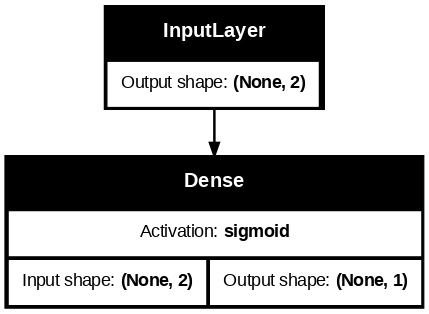

In [95]:
keras.utils.plot_model(
    model1,
    show_shapes = True,
    dpi=90,
    show_layer_activations = True,
    to_file = "keras_functional_model1.png"
)

Sisanya (*compile* lalu *fit*) sama dengan Sequential API

In [11]:
model1.compile(
    optimizer = keras.optimizers.SGD(learning_rate = 0.01),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = [keras.metrics.BinaryAccuracy()]
)

In [12]:
history1 = model1.fit(inputs_arr, targets_arr, epochs=100, validation_split=0.2)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.5514 - loss: 0.9587 - val_binary_accuracy: 0.1800 - val_loss: 1.0349
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7520 - loss: 0.4645 - val_binary_accuracy: 0.7825 - val_loss: 0.5331
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9507 - loss: 0.2794 - val_binary_accuracy: 0.9500 - val_loss: 0.3396
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9894 - loss: 0.1936 - val_binary_accuracy: 0.9675 - val_loss: 0.2492
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9928 - loss: 0.1603 - val_binary_accuracy: 0.9800 - val_loss: 0.1991
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9951 - loss: 0.1297 - val_binary_accuracy: 0.9850 - val_loss: 0.1672
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9956 - loss: 0.1105 - val_binary_accuracy: 0.9875 - val_loss: 0.1451
Epoch 8/100
5

Kita bisa ubah *dictionary* `.history` menjadi CSV:

In [13]:
pd.DataFrame(history1.history).to_csv("./keras_functional_history1.csv", index=False)

Silakan download kalau mau menyocokkan/membandingkan dengan modul: [keras_functional_history1.csv](./keras_functional_history1.csv)

Import kembali:

In [14]:
history1_df = pd.read_csv("./keras_functional_history1.csv")

Lalu plot *loss*:

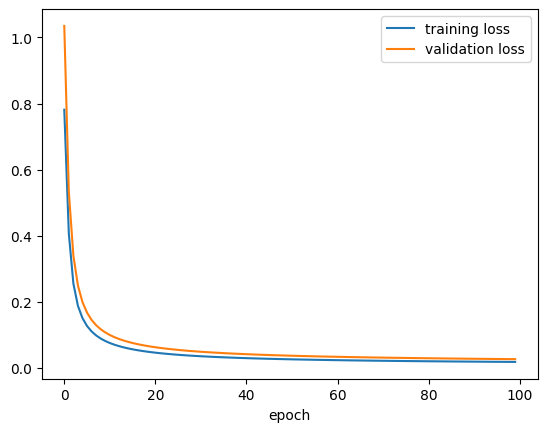

In [15]:
plt.plot(history1_df["loss"], label = "training loss")
plt.plot(history1_df["val_loss"], label = "validation loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

## *Subclassing API* (yaitu dengan OOP)

Untuk model yang lebih kompleks, mungkin komposisi fungsi akan membuat pusing, karena banyak fungsi bertebaran di mana-mana. Agar lebih rapi dan terstruktur, kita bisa gunakan *Subclassing API*, yaitu dengan OOP / *object oriented programming*.

Silakan *review* [Modul 2 Praktikum Struktur Data tentang Pengantar OOP](../../../2024/ganjil/strukdat/modul2.ipynb) kalau perlu ;)

Dalam *Subclassing API*, model yang kita buat berupa *class* yang meng-*inherit* (atau disebut *subclassing*) dari `keras.Model` yang sudah mengimplementasikan sebagian besar *method* yang kita butuhkan.

(Bahkan, kita juga bisa buat *class* yang hanya berupa kumpulan *layer*, yang nantinya akan masuk lagi ke *class* lain. Kalian bisa pelajari lebih lanjut: <https://keras.io/guides/making_new_layers_and_models_via_subclassing/>)

Dalam model yang kita susun, hanya diperlukan:

- *constructor* `__init__` berisi minimal satu baris, yaitu `super().__init__()` dan boleh berisi baris lainnya untuk menyiapkan atribut (variabel) yang langsung bisa dibuat ketika model dibuat (sebelum mulai *training*)

- *method* `call` yang mendefinisikan bagaimana *forward pass*

- (opsional) *method* `build` yang menyiapkan atribut yang bisa dibuat di awal *training* setelah ukuran input diketahui

In [16]:
class MyPerceptron(keras.Model):
    def __init__(self, units=1):
        super().__init__()

        # banyaknya neuron di output layer
        self.units = units

    # menyiapkan parameter (weights and biases) tergantung ukuran input
    def build(self, input_shape):
        input_dim = input_shape[-1]

        # matriks W terkadang disebut kernel
        self.kernel = self.add_weight(
            shape = (input_dim, self.units),
            initializer = keras.initializers.RandomNormal(mean=0, stddev=0.05),
            trainable = True,
        )
        self.bias = self.add_weight(
            shape = (self.units,),
            initializer = keras.initializers.RandomNormal(),
            trainable = True
        )

    # forward pass
    def call(self, inputs):
        return tf.sigmoid(
            tf.matmul(inputs, self.kernel) + self.bias
        )

Kita harus membuat *instance* atau objek dari *class* ini terlebih dahulu, lalu memanggil `.build()` dulu, agar kemudian bisa melakukan misalnya `.fit()`

In [17]:
model2 = MyPerceptron()

In [18]:
model2.build(input_shape = (2,))

Sekarang kita bisa *compile*, *fit*, simpan *history*, dan plot *loss* seperti biasa...

In [19]:
model2.compile(
    optimizer = keras.optimizers.SGD(learning_rate = 0.01),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = [keras.metrics.BinaryAccuracy()]
)

In [20]:
history2 = model2.fit(inputs_arr, targets_arr, epochs=100, validation_split=0.2)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.9943 - loss: 0.5099 - val_binary_accuracy: 0.9875 - val_loss: 0.3759
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9917 - loss: 0.2930 - val_binary_accuracy: 0.9875 - val_loss: 0.2786
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9947 - loss: 0.2099 - val_binary_accuracy: 0.9875 - val_loss: 0.2223
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9982 - loss: 0.1617 - val_binary_accuracy: 0.9900 - val_loss: 0.1860
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9967 - loss: 0.1317 - val_binary_accuracy: 0.9900 - val_loss: 0.1609
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9944 - loss: 0.1183 - val_binary_accuracy: 0.9900 - val_loss: 0.1426
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9965 - loss: 0.1053 - val_binary_accuracy: 0.9900 - val_loss: 0.1285
Epoch 8/100
5

In [21]:
pd.DataFrame(history2.history).to_csv("./keras_subclassing_history2.csv", index=False)

Silakan download kalau mau menyocokkan/membandingkan dengan modul: [keras_subclassing_history2.csv](./keras_subclassing_history2.csv)

In [22]:
history2_df = pd.read_csv("./keras_subclassing_history2.csv")

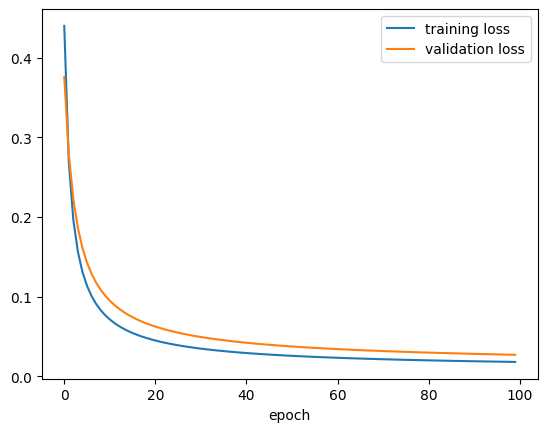

In [23]:
plt.plot(history2_df["loss"], label = "training loss")
plt.plot(history2_df["val_loss"], label = "validation loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

Sebenarnya, kalian bisa saja menggunakan *Functional API* di dalam *class*: siapkan fungsi-fungsinya di dalam *constructor* `__init__` dan gunakan di dalam `call`

In [24]:
class MyPerceptron_v2(keras.Model):
    def __init__(self, units=1):
        super().__init__()

        # banyaknya neuron di output layer
        self.units = units

        # siapkan fungsi
        self.layer1_func = keras.layers.Dense(
            units = self.units,
            activation = keras.activations.sigmoid
        )

    # forward pass
    def call(self, inputs):
        x = self.layer1_func(inputs)
        return x

# Contoh *skip connection* dengan *Functional API*

Kita lihat lagi gambar *skip connection*:

![](./static/aggarwal_nndl_hal348.png)

Sumber gambar: Aggarwal (2018) hal. 348

Dari gambarnya, kita bisa coba susun *neural network* nya:

In [25]:
# x
f3_input = keras.layers.Input(shape = (5,))

# weight layers
f3_layer1_func = keras.layers.Dense(units = 10, activation = keras.activations.linear)
f3_layer2_func = keras.layers.Dense(units = 5, activation = keras.activations.relu)

# F(x)
F_out = f3_layer2_func(f3_layer1_func(f3_input))

# F(x) + x
f3_layer3_out = F_out + f3_input

# membuat model akhir
model3 = keras.Model(inputs=f3_input, outputs=f3_layer3_out, name="model3")

In [26]:
model3.summary()

Model: "model3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 10)        │         60 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 5)         │         55 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 5)         │          0 │ dense_4[0][0],    │
│                     │                   │            │ input_layer_3[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

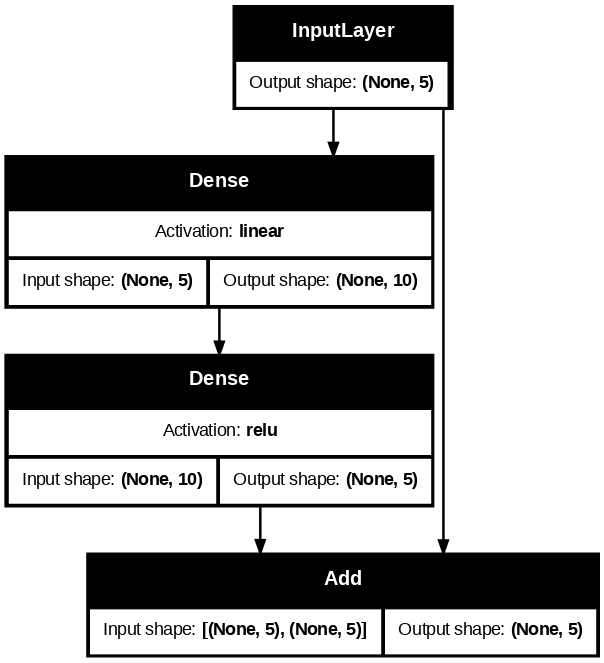

In [94]:
keras.utils.plot_model(
    model3,
    show_shapes = True,
    dpi=90,
    show_layer_activations = True,
    to_file = "keras_functional_model3.png"
)

Apabila kode *Functional API* itu disusun ke dalam *class*, kodenya bisa menjadi seperti berikut:

In [28]:
class MySkipConnection(keras.Model):
    def __init__(self, units=5):
        super().__init__()

        # banyaknya neuron di output layer
        self.units = units

        # siapkan fungsi-fungsi
        self.weight1_func = keras.layers.Dense(
            units = 10,
            activation = keras.activations.linear
        )
        self.weight2_func = keras.layers.Dense(
            units = self.units,
            activation = keras.activations.relu
        )

    # forward pass
    def call(self, inputs):
        F_x = self.weight2_func(self.weight1_func(inputs))
        x = inputs
        hasil = F_x + x
        return hasil

# *Neural Network* untuk Regresi

Ingat kembali, untuk regresi,

- banyaknya *neuron* di *input layer* sesuai banyaknya fitur/variabel prediktor

- banyaknya *neuron* di *output layer* sesuai banyaknya fitur/variabel target (biasanya hanya satu), dan fungsi aktivasi yang digunakan adalah fungsi aktivasi linier/identitas

- fungsi aktivasi untuk semua *hidden layer* biasanya ReLU

Kita akan coba lagi dataset "California Housing Prices" (housing.csv) yang sudah kita gunakan di [Modul 3](./modul3.ipynb) tentang regresi, yang bisa didownload dari salah satu sumber berikut:

* [Direct link (langsung dari GitHub Pages ini)](./housing.csv)

* Kaggle: <https://www.kaggle.com/datasets/camnugent/california-housing-prices>

Mari kita lihat isinya

In [29]:
housing_df = pd.read_csv("./housing.csv")

In [30]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Kalau mau, kalian bisa melakukan *encoding* data kategorik `ocean_proximity` seperti di [Modul 2](./modul2.ipynb). Tapi kali ini kita hapus/*drop* saja

In [31]:
housing_df = housing_df.drop(columns=["ocean_proximity"])

In [32]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


Ingat bahwa variabel target (variabel yang ingin kita prediksi) adalah `median_house_value`. Kita pisah dulu antara variabel prediktor (X atau inputs) dan variabel target (y atau target)

In [33]:
housing_X_df = housing_df.drop(columns=["median_house_value"])
housing_y_df = housing_df[["median_house_value"]]

Lalu kita ubah jadi numpy array agar bisa diolah Keras

In [34]:
housing_X_arr = housing_X_df.to_numpy()
housing_y_arr = housing_y_df.to_numpy()

In [35]:
print(housing_X_arr.shape)
print(housing_y_arr.shape)

(20640, 8)
(20640, 1)


Train test split, standarisasi:

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    housing_X_arr, housing_y_arr, test_size=0.1, random_state=42
)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Data target juga relatif sangat besar, sehingga sebaiknya kita *scaling* juga:

In [40]:
print(f'y min: {y_train.min()}')
print(f'y max: {y_train.max()}')

y min: 14999.0
y max: 500001.0


In [41]:
y_train /= 100000
y_test /= 100000

In [42]:
print(f'y min: {y_train.min()}')
print(f'y max: {y_train.max()}')

y min: 0.14999
y max: 5.00001


Sekarang kita bisa susun modelnya

In [43]:
keras.backend.clear_session()

In [45]:
model4 = keras.Sequential(
    [
        keras.layers.InputLayer(shape = (housing_X_arr.shape[1:])),
        keras.layers.Dense(units = 15, activation = keras.activations.relu),
        keras.layers.Dense(units = 30, activation = keras.activations.relu),
        keras.layers.Dense(units = 1, activation = keras.activations.linear)
    ]
)

In [46]:
model4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 15)             │           135 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646 (2.52 KB)

 Trainable params: 646 (2.52 KB)

 Non-trainable params: 0 (0.00 B)

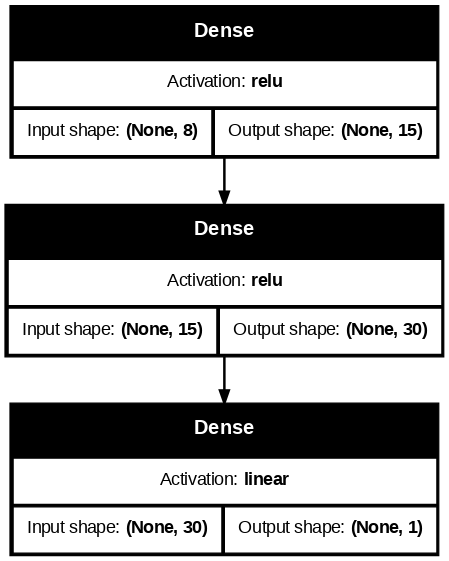

In [93]:
keras.utils.plot_model(
    model4,
    show_shapes = True,
    dpi=90,
    show_layer_activations = True,
    to_file = "keras_sequential_model4.png"
)

Selanjutnya, kita tentukan *hyperparameter*: *optimizer*, *loss function*, dan *accuracy*.

Ingat kembali, untuk regresi, *loss function* yang biasa digunakan adalah MSE *(Mean Squared Error)*

In [48]:
early_stop = keras.callbacks.EarlyStopping(
    patience=5, monitor='val_loss', restore_best_weights=True, verbose=1
)

In [49]:
model4.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    loss = keras.losses.MeanSquaredError(),
    metrics = [keras.metrics.Accuracy()]
)

In [50]:
history4 = model4.fit(X_train, y_train, epochs=100, validation_split=1/9)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: 3.5122 - val_accuracy: 0.0000e+00 - val_loss: 0.5872
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: 0.5322 - val_accuracy: 0.0000e+00 - val_loss: 0.4665
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4251 - val_accuracy: 0.0000e+00 - val_loss: 0.4366
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4054 - val_accuracy: 0.0000e+00 - val_loss: 0.4219
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: 0.3723 - val_accuracy: 0.0000e+00 - val_loss: 0.4157
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.3596 - val_accuracy: 0.0000e+00 - val_loss: 0.3996
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3573 - val_accuracy: 0.0000e+00 - val_loss: 0.4091
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 

In [51]:
pd.DataFrame(history4.history).to_csv("./keras_sequential_history4.csv", index=False)

Silakan download kalau mau menyocokkan/membandingkan dengan modul: [keras_sequential_history4.csv](./keras_sequential_history4.csv)

In [52]:
history4_df = pd.read_csv("./keras_sequential_history4.csv")

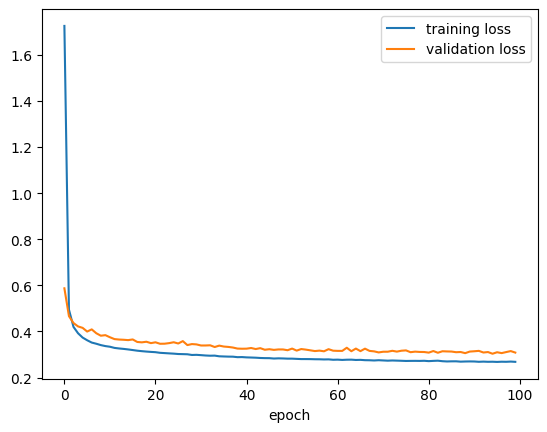

In [53]:
plt.plot(history4_df["loss"], label = "training loss")
plt.plot(history4_df["val_loss"], label = "validation loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


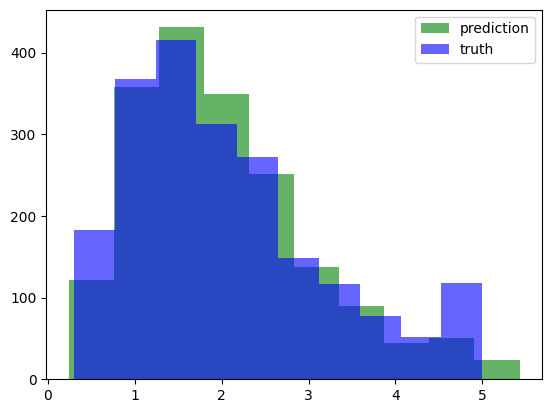

In [54]:
y_pred = model4.predict(X_test)

plt.hist(y_pred, color='green', alpha=.6)
plt.hist(y_test, color='blue', alpha=.6)
plt.legend(['prediction', 'truth'], loc='upper right')
plt.show()

# Klasifikasi Gambar dengan *flatten*

Gambar atau citra *(image)* adalah sekumpulan pixel yang disusun secara dua dimensi. Sejauh ini, *neural network* yang kita pelajari memiliki satu *input layer* yang "flat" atau datar. Sehingga, apabila kita ingin meng-*input* data citra ke dalam *neural network*, caranya adalah dengan *flatten*, yaitu data citra yang mula-mula dua dimensi itu disusun ulang menjadi satu dimensi.

Di Keras, ada *layer* istimewa untuk melakukan *flatten* untuk gambar berukuran `a` kali `b` pixel:

`keras.layers.Flatten(input_shape = (a, b))`

Ketika berurusan dengan data citra, *layer* ini menggantikan `InputLayer` yang biasa kita gunakan.

## Persiapan dataset Fashion MNIST

Mari kita coba menggunakan dataset Fashion MNIST yang sudah tersedia dari Keras:

In [55]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [56]:
print(f'X_train_full shape: {X_train_full.shape}')
print(f'y_train_full shape: {y_train_full.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train_full shape: (60000, 28, 28)
y_train_full shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [57]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=1/6, random_state=42
)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (50000, 28, 28)
y_train shape: (50000,)
X_val shape: (10000, 28, 28)
y_val shape: (10000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [58]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

Ada 10 kelas:

In [59]:
print(set(y_train))

{np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}


In [60]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [61]:
print(len(class_names))

10


Kita lihat salah satu gambarnya:

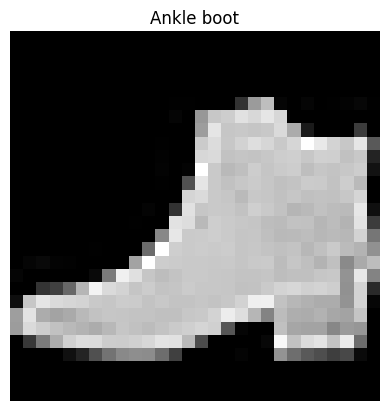

In [66]:
#@title Slider to look for some image examples {run: "auto"}
idx = 12103 #@param {type:"slider", min:0, max:49999, step:1}

plt.imshow(X_train[idx], cmap='gray')
plt.title(class_names[y_train[idx]])
plt.axis('OFF')
plt.show()

## Menyusun *neural network* dan *training*

In [ ]:
model5 = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(units=100, activation=keras.activations.relu),
        keras.layers.Dense(units=50, activation=keras.activations.relu),
        keras.layers.Dense(units=10, activation=keras.activations.softmax)
    ]
)

In [73]:
model5.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.CategoricalAccuracy()]
)

In [74]:
model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
history5 = model5.fit(
    X_train, y_train, validation_data=(X_val, y_val),
    epochs=50, batch_size=256
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - categorical_accuracy: 0.0701 - loss: 0.9699 - val_categorical_accuracy: 0.0708 - val_loss: 0.4785
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - categorical_accuracy: 0.0557 - loss: 0.4452 - val_categorical_accuracy: 0.0696 - val_loss: 0.4183
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - categorical_accuracy: 0.0741 - loss: 0.3899 - val_categorical_accuracy: 0.0664 - val_loss: 0.3901
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - categorical_accuracy: 0.0567 - loss: 0.3662 - val_categorical_accuracy: 0.0683 - val_loss: 0.3663
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - categorical_accuracy: 0.0654 - loss: 0.3346 - val_categorical_accuracy: 0.0676 - val_loss: 0.3551
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - categorical_accuracy: 0.0714 - loss: 0.3244 - val_categorical_accuracy: 0.0687 - val_loss: 0.3429
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - categorical_accuracy: 0.0571 - 

In [76]:
pd.DataFrame(history5.history).to_csv("./keras_sequential_history5.csv", index=False)

Silakan download kalau mau menyocokkan/membandingkan dengan modul: [keras_sequential_history5.csv](./keras_sequential_history5.csv)

In [77]:
history5_df = pd.read_csv("./keras_sequential_history5.csv")

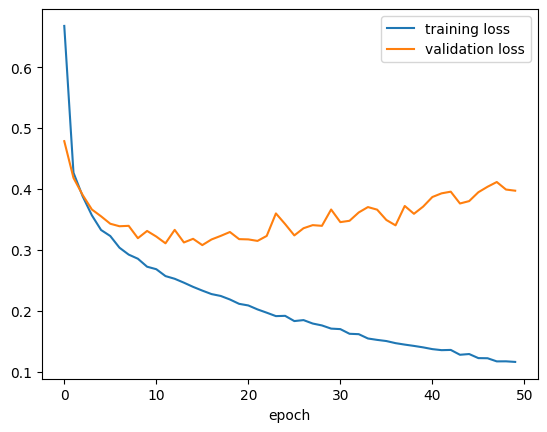

In [78]:
plt.plot(history5_df["loss"], label = "training loss")
plt.plot(history5_df["val_loss"], label = "validation loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

## Hasil prediksi

In [79]:
y_pred = model5.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [80]:
y_pred

array([[3.89048516e-11, 4.46032236e-13, 1.15040265e-07, ...,
        7.68356957e-04, 1.53650914e-09, 9.99195278e-01],
       [1.14122786e-05, 1.14619886e-17, 9.99554217e-01, ...,
        6.40274208e-26, 1.08185377e-20, 2.92538757e-20],
       [6.54131643e-13, 9.99999940e-01, 2.02682177e-14, ...,
        3.08884612e-27, 8.57785633e-17, 7.88850808e-22],
       ...,
       [2.20215043e-07, 2.50604574e-14, 1.06251505e-08, ...,
        2.62424783e-16, 9.99996841e-01, 1.48581980e-14],
       [4.54307078e-11, 9.99999821e-01, 2.46371868e-12, ...,
        2.12386693e-15, 2.25630886e-11, 1.52572101e-13],
       [5.45784440e-09, 1.40065348e-09, 2.73625567e-08, ...,
        1.97790158e-07, 7.04383538e-08, 1.70042716e-10]], dtype=float32)

In [81]:
y_pred[123]

array([3.7125845e-17, 3.0286391e-20, 5.5658371e-16, 7.8263640e-24,
       6.0593184e-15, 1.0014137e-12, 1.4839321e-22, 1.1881163e-07,
       1.8030655e-16, 9.9999982e-01], dtype=float32)

In [82]:
np.argmax(y_pred[123])

np.int64(9)

Kita bisa melihat hasil prediksi:

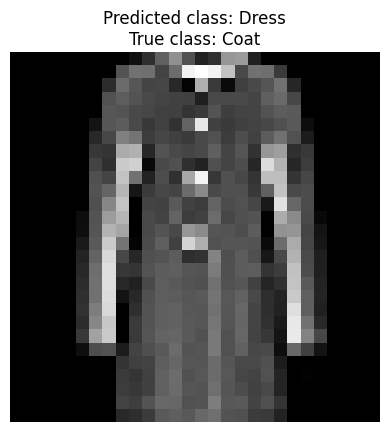

In [87]:
#@title Slider to look for some prediction examples {run: "auto"}
idx = 4922 #@param {type:"slider", min:0, max:9999, step:1}

plt.imshow(X_test[idx], cmap='gray')
plt.title(
    f"Predicted class: {class_names[int(np.argmax(y_pred[idx]))]}\n" +
    f"True class: {class_names[y_test[idx]]}"
)
plt.axis('OFF')
plt.show()

# Pengantar CNN *(Convolutional Neural Network)*

Sebenarnya, menerima input gambar dengan teknik *flatten* itu kurang efektif.

- Dengan *dense layer*, bahkan dua pixel yang sangat jauh itu juga terhubungkan, padahal seharusnya tidak berhubungan.

- Karena itu juga, tidak ada penekanan hubungan antara dua pixel yang saling berdekatan.

Alangkah baiknya, ada teknik input gambar yang bisa mempertimbangkan bagaimana hubungan suatu pixel dengan pixel-pixel di sekitarnya saja, daripada dengan semua pixel.

*Convolutional Neural Network* (CNN) mencoba mengatasi hal ini. Ciri khasnya adalah adanya dua jenis *layer* baru:

- *convolution layer*

- *pooling layer*, biasanya *max pooling*

Kedua *layer* baru ini bersifat *sparse*, yaitu beberapa *neuron* terhubung dengan beberapa *neuron* saja, tidak dengan semuanya.

Gambar berikut ini membandingkan antara *sparse layer* dengan *dense layer*:

![](./static/goodfellow_dl_hal337.png)

Sumber gambar: Goodfellow, et. al. (2016) hal. 337

## Konsep *convolution layer*

Suatu *convolution layer* menghitung "konvolusi" *(convolution)*.

![](./static/kotu_dscp10_hal325.png)

Sumber gambar: Kotu, hal. 325

Perhitungan konvolusi selalu melibatkan suatu *"filter"*, yang nilai-nilainya menjadi parameter (seperti *weights and biases*) yang terus di-*update* selama proses *training*.

![](./static/aggarwal_nndl_hal321.png)

Sumber gambar: Aggarwal (2018) hal. 321

Contoh perhitungan menggunakan *filter* bisa dilihat di gambar berikut.

![](./static/aggarwal_nndl_hal336.png)

Sumber gambar: Aggarwal (2018) hal. 336

Ketika menghitung konvolusi, *filter* selalu digeser. Pergeseran *filter* ini sebenarnya tidak harus satu langkah. Bisa saja, misalnya, dua langkah. Banyaknya langkah ini disebut *stride*.

![](./static/kotu_dscp10_hal328_1.png)

Sumber gambar: Kotu, hal. 328

## Konsep *pooling layer*

Daripada menghitung konvolusi, *pooling* hanya menghitung statistik sederhana saja. Biasanya menghitung maksimum, yang disebut *max pooling*.

![](./static/kotu_dscp10_hal328_2.png)

Sumber gambar: Kotu, hal. 328

## LeNet-5: salah satu arsitektur CNN pertama

Note: aslinya, LeNet-5 menggunakan *average pooling*, yaitu menghitung rata-rata, tidak seperti *max pooling* yang memilih maksimum.

![](./static/aggarwal_nndl_hal41.png)

Sumber gambar: Aggarwal (2018) hal. 41

Arsitektur LeNet-5 menggunakan Keras bisa disusun sebagai berikut:

In [88]:
lenet5 = keras.Sequential()

lenet5.add(keras.layers.Conv2D(
    input_shape = (32, 32, 1),
    kernel_size = (5, 5),
    filters = 6,
    activation = keras.activations.sigmoid
)) # menghasilkan C1 di gambar: ukuran 28 x 28 x 6

lenet5.add(keras.layers.AveragePooling2D(
    pool_size = (2, 2),
    strides = 2
)) # menghasilkan S2 di gambar: ukuran 14 x 14 x 6

lenet5.add(keras.layers.Conv2D(
    kernel_size = (5, 5),
    filters = 16,
    activation = keras.activations.sigmoid
)) # menghasilkan C3 di gambar: ukuran 10 x 10 x 16

lenet5.add(keras.layers.AveragePooling2D(
    pool_size = (2, 2),
    strides = 2
)) # menghasilkan S4 di gambar: ukuran 5 x 5 x 16

lenet5.add(keras.layers.Flatten())
# menjadi C5 di gambar, dengan 400 neuron

lenet5.add(keras.layers.Dense(
    units = 120, activation = keras.activations.sigmoid
))

lenet5.add(keras.layers.Dense(
    units = 84, activation = keras.activations.sigmoid
))

lenet5.add(keras.layers.Dense(
    units = 10, activation = keras.activations.softmax
))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


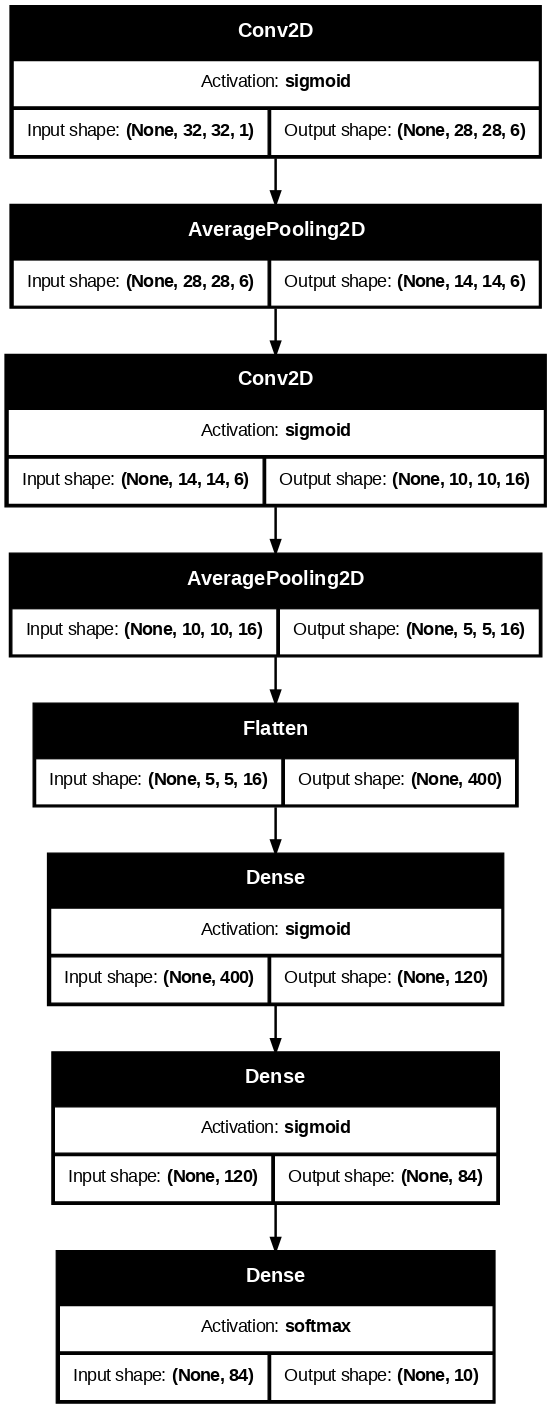

In [92]:
keras.utils.plot_model(
    lenet5,
    show_shapes = True,
    dpi=90,
    show_layer_activations = True,
    to_file = "keras_sequential_lenet5.png"
)

# Referensi

Sumber gambar

- Aggarwal, C. Charu. 2018. *Neural Networks and Deep Learning: A Textbook.* Edisi Pertama. Springer.

- Goodfellow, Ian; Bengio, Yoshua; & Courville, Aaron. 2016. *Deep Learning*. MIT Press.

- Kotu, Data Science Concepts and Practice